In [ ]:
# Example notebook to determine optimum number of clusters to use 
# for k-means clustering on wind velocity from ERA5 on the small denmark domain

# The code for the other domains and variables is the same but the data read in would be different


In [ ]:
# import relevant packages
import numpy as np
import pandas as pd
import pylab as plt
from netCDF4 import Dataset
import glob
import os

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Read in ERA5 reanalysis data from 2000 - 2009

uu_2000_list = []
vv_2000_list = []
fname_list = []

path = "/rds/general/project/wrfwindpower/live/WPS_2000/"
path_txt = str(path) + '/met_em.d02.2000*.nc'
for fname in glob.glob(path_txt):
    fname_list.append(fname)
fname_list.sort()

for fname in fname_list:
    tmp = Dataset(fname)
    uu_2000_list.append(tmp['UU'][0][1].data)
    vv_2000_list.append(tmp['VV'][0][1].data)

uu_2001_list = []
vv_2001_list = []
fname_list = []

path = "/rds/general/project/wrfwindpower/live/WPS_2001/"
path_txt = str(path) + '/met_em.d02.2001*.nc'
for fname in glob.glob(path_txt):
    fname_list.append(fname)
fname_list.sort()

for fname in fname_list:
    tmp = Dataset(fname)
    uu_2001_list.append(tmp['UU'][0][1].data)
    vv_2001_list.append(tmp['VV'][0][1].data)

uu_2002_list = []
vv_2002_list = []
fname_list = []

path = "/rds/general/project/wrfwindpower/live/WPS_2002/"
path_txt = str(path) + '/met_em.d02.2002*.nc'
for fname in glob.glob(path_txt):
    fname_list.append(fname)
fname_list.sort()

for fname in fname_list:    
    tmp = Dataset(fname)
    uu_2002_list.append(tmp['UU'][0][1].data)
    vv_2002_list.append(tmp['VV'][0][1].data)

uu_2003_list = []
vv_2003_list = []
fname_list = []

path = "/rds/general/project/wrfwindpower/live/WPS_2003/"
path_txt = str(path) + '/met_em.d02.2003*.nc'
for fname in glob.glob(path_txt):
        fname_list.append(fname)
fname_list.sort()

for fname in fname_list:
    tmp = Dataset(fname)
    uu_2003_list.append(tmp['UU'][0][1].data)
    vv_2003_list.append(tmp['VV'][0][1].data)

uu_2004_list = []
vv_2004_list = []
fname_list = []

path = "/rds/general/project/wrfwindpower/live/WPS_2004/"
path_txt = str(path) + '/met_em.d02.2004*.nc'
for fname in glob.glob(path_txt):
        fname_list.append(fname)
fname_list.sort()

for fname in fname_list:
    tmp = Dataset(fname)
    uu_2004_list.append(tmp['UU'][0][1].data)
    vv_2004_list.append(tmp['VV'][0][1].data)

uu_2005_list = []
vv_2005_list = []
fname_list = []

path = "/rds/general/project/wrfwindpower/live/WPS_2005/"
path_txt = str(path) + '/met_em.d02.2005*.nc'
for fname in glob.glob(path_txt):
        fname_list.append(fname)
fname_list.sort()

for fname in fname_list:
    tmp = Dataset(fname)
    uu_2005_list.append(tmp['UU'][0][1].data)
    vv_2005_list.append(tmp['VV'][0][1].data)

uu_2006_list = []
vv_2006_list = []
fname_list = []

path = "/rds/general/project/wrfwindpower/live/WPS_2006/"
path_txt = str(path) + '/met_em.d02.2006*.nc'
for fname in glob.glob(path_txt):
        fname_list.append(fname)
fname_list.sort()

for fname in fname_list:
    tmp = Dataset(fname)
    uu_2006_list.append(tmp['UU'][0][1].data)
    vv_2006_list.append(tmp['VV'][0][1].data)
    
uu_2007_list = []
vv_2007_list = []
fname_list = []

path = "/rds/general/project/wrfwindpower/live/WPS_2007/"
path_txt = str(path) + '/met_em.d02.2007*.nc'
for fname in glob.glob(path_txt):
        fname_list.append(fname)
fname_list.sort()

for fname in fname_list:
    tmp = Dataset(fname)
    uu_2007_list.append(tmp['UU'][0][1].data)
    vv_2007_list.append(tmp['VV'][0][1].data)

uu_2008_list = []
vv_2008_list = []
fname_list = []

path = "/rds/general/project/wrfwindpower/live/WPS_2008/"
path_txt = str(path) + '/met_em.d02.2008*.nc'
for fname in glob.glob(path_txt):
        fname_list.append(fname)
fname_list.sort()

for fname in fname_list:
    tmp = Dataset(fname)
    uu_2008_list.append(tmp['UU'][0][1].data)
    vv_2008_list.append(tmp['VV'][0][1].data)

uu_2009_list = []
vv_2009_list = []
fname_list = []

path = "/rds/general/project/wrfwindpower/live/WPS_2009/"
path_txt = str(path) + '/met_em.d02.2009*.nc'
for fname in glob.glob(path_txt):
        fname_list.append(fname)
fname_list.sort()

for fname in fname_list:
    tmp = Dataset(fname)
    uu_2009_list.append(tmp['UU'][0][1].data)
    vv_2009_list.append(tmp['VV'][0][1].data)


In [4]:
# Combine velocities into arrays
uu_list = uu_2000_list + uu_2001_list + uu_2002_list + uu_2003_list + uu_2004_list + uu_2005_list + uu_2006_list + uu_2007_list + uu_2008_list + uu_2009_list
vv_list = vv_2000_list + vv_2001_list + vv_2002_list + vv_2003_list + vv_2004_list + vv_2005_list + vv_2006_list + vv_2007_list + vv_2008_list + vv_2009_list

u_arr = np.array(uu_list)[:, :153, :72]
v_arr = np.array(vv_list)[:, :153, :72]

u_combined = np.concatenate([u_arr.reshape(u_arr.shape[0], u_arr.shape[1], u_arr.shape[2], 1), 
                             v_arr.reshape(v_arr.shape[0], v_arr.shape[1], v_arr.shape[2], 1)], axis = -1)

### KMeans clusters

In [5]:
# Cluster data using from 2 clusters to 28 clusters and record scores like the mean error and mean correlation
# between each cluster centre and each datapoint in the cluster, as well as the silhouette score for each cluster

mean_err_all = []
mean_corr_all = []
cluster_err = []
sil_all = []

for cluster_num in range(2, 28):
    print(cluster_num)
    u_climat_reshape = u_combined.reshape(u_combined.shape[0], u_combined.shape[1]*u_combined.shape[2]*2)
    kmeans = KMeans(n_clusters=cluster_num, random_state=0).fit(u_climat_reshape)
    labels_df = pd.DataFrame(kmeans.labels_)
    cluster_centres = kmeans.cluster_centers_.reshape(cluster_num,u_combined.shape[1], u_combined.shape[2], 2)

    mean_err_list = []
    mean_err_cluster_list = []
    mean_corr_list = []

    for i in range(cluster_num):
        pattern_labels = labels_df[labels_df[0] == i].reset_index()['index']
        u_pattern_0 = np.array([u_combined[j] for j in pattern_labels])
        u_mean = u_pattern_0.mean(axis = 0)
        u_cluster_centre = cluster_centres[i]

        err_list = []    
        corr_list = []
        for l in u_pattern_0:
            err_list.append(np.abs(l - u_mean).sum())
            corr_list.append(np.corrcoef(l[:, :, 0].reshape(153*72), u_mean[:, :, 0].reshape(153*72))[0][1] + np.corrcoef(l[:, :, 1].reshape(153*72), u_mean[:, :, 1].reshape(153*72))[0][1])
        mean_err_list.append(np.mean(np.abs(err_list)))
        mean_corr_list.append(np.mean(corr_list))
        
        err_cluster_list = []    
        for l in u_pattern_0:
            err_cluster_list.append(np.abs(l - u_cluster_centre).sum())
        mean_err_cluster_list.append(np.mean(np.abs(err_cluster_list)))
        
    mean_err_all.append(mean_err_list)
    cluster_err.append(mean_err_cluster_list)
    mean_corr_all.append(mean_corr_list)

    labels = kmeans.labels_
    sil_all.append(silhouette_score(u_climat_reshape, labels, metric = 'euclidean'))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


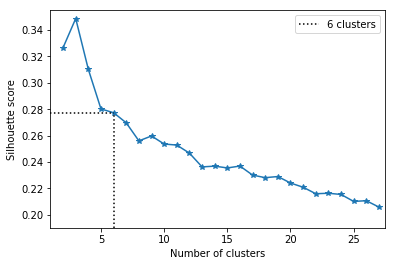

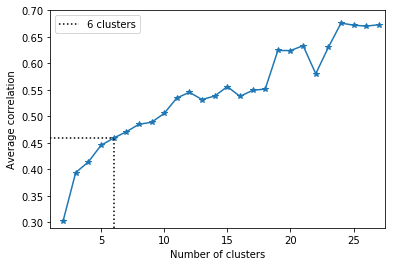

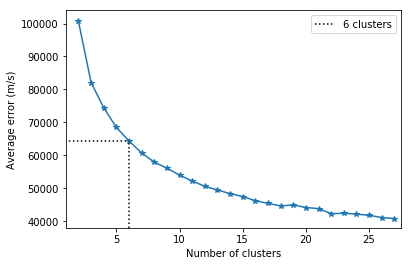

In [27]:
# plot cluster scores for figures for paper with 6 clusters (the chosen number of clusters) highlighted
plt.plot(range(2, 28), sil_all, '-*')
plt.plot([6, 6], [0.19, sil_all[4]], 'k:')
plt.plot([0, 6], [sil_all[4], sil_all[4]], 'k:', label = '6 clusters')
plt.xlim([1, 27.5])
plt.ylim([0.19, 0.355])
plt.legend()
plt.ylabel('Silhouette score')
plt.xlabel('Number of clusters')
plt.show()
plt.plot(range(2, 28), [np.mean(i) for i in mean_corr_all], '-*')
plt.plot([6, 6], [0.29, [np.mean(i) for i in mean_corr_all][4]], 'k:')
plt.plot([0, 6], [[np.mean(i) for i in mean_corr_all][4], [np.mean(i) for i in mean_corr_all][4]], 'k:', label = '6 clusters')
plt.xlim([1, 27.5])
plt.ylim([0.29, 0.7])
plt.legend()
plt.xlabel('Number of clusters')
plt.ylabel('Average correlation')
plt.show()
plt.plot(range(2, 28), [np.mean(i) for i in cluster_err], '-*')
plt.plot([6, 6], [3.8e4, [np.mean(i) for i in cluster_err][4]], 'k:')
plt.plot([0, 6], [[np.mean(i) for i in cluster_err][4], [np.mean(i) for i in cluster_err][4]], 'k:', label = '6 clusters')
plt.xlim([1, 27.5])
plt.ylim([3.8e4, 1.04e5])
plt.xlabel('Number of clusters')
plt.ylabel('Average error (m/s)')
plt.legend()
plt.show()